In [2]:
# on charge la bibliothèque pour faire nos graphiques
import matplotlib.pyplot as plt
plt.ion()
%matplotlib notebook 

In [10]:
# et numpy pour faire des calculs plus efficaces
import numpy as np

In [11]:
# on vise l'intervalle 2.4:4 qui est le plus intéressant
rmin=2.4

In [12]:
# notre fonction logistique
def logistic(r, x):
    return r * x * (1 - x)

# Première version simple

<IPython.core.display.Javascript object>


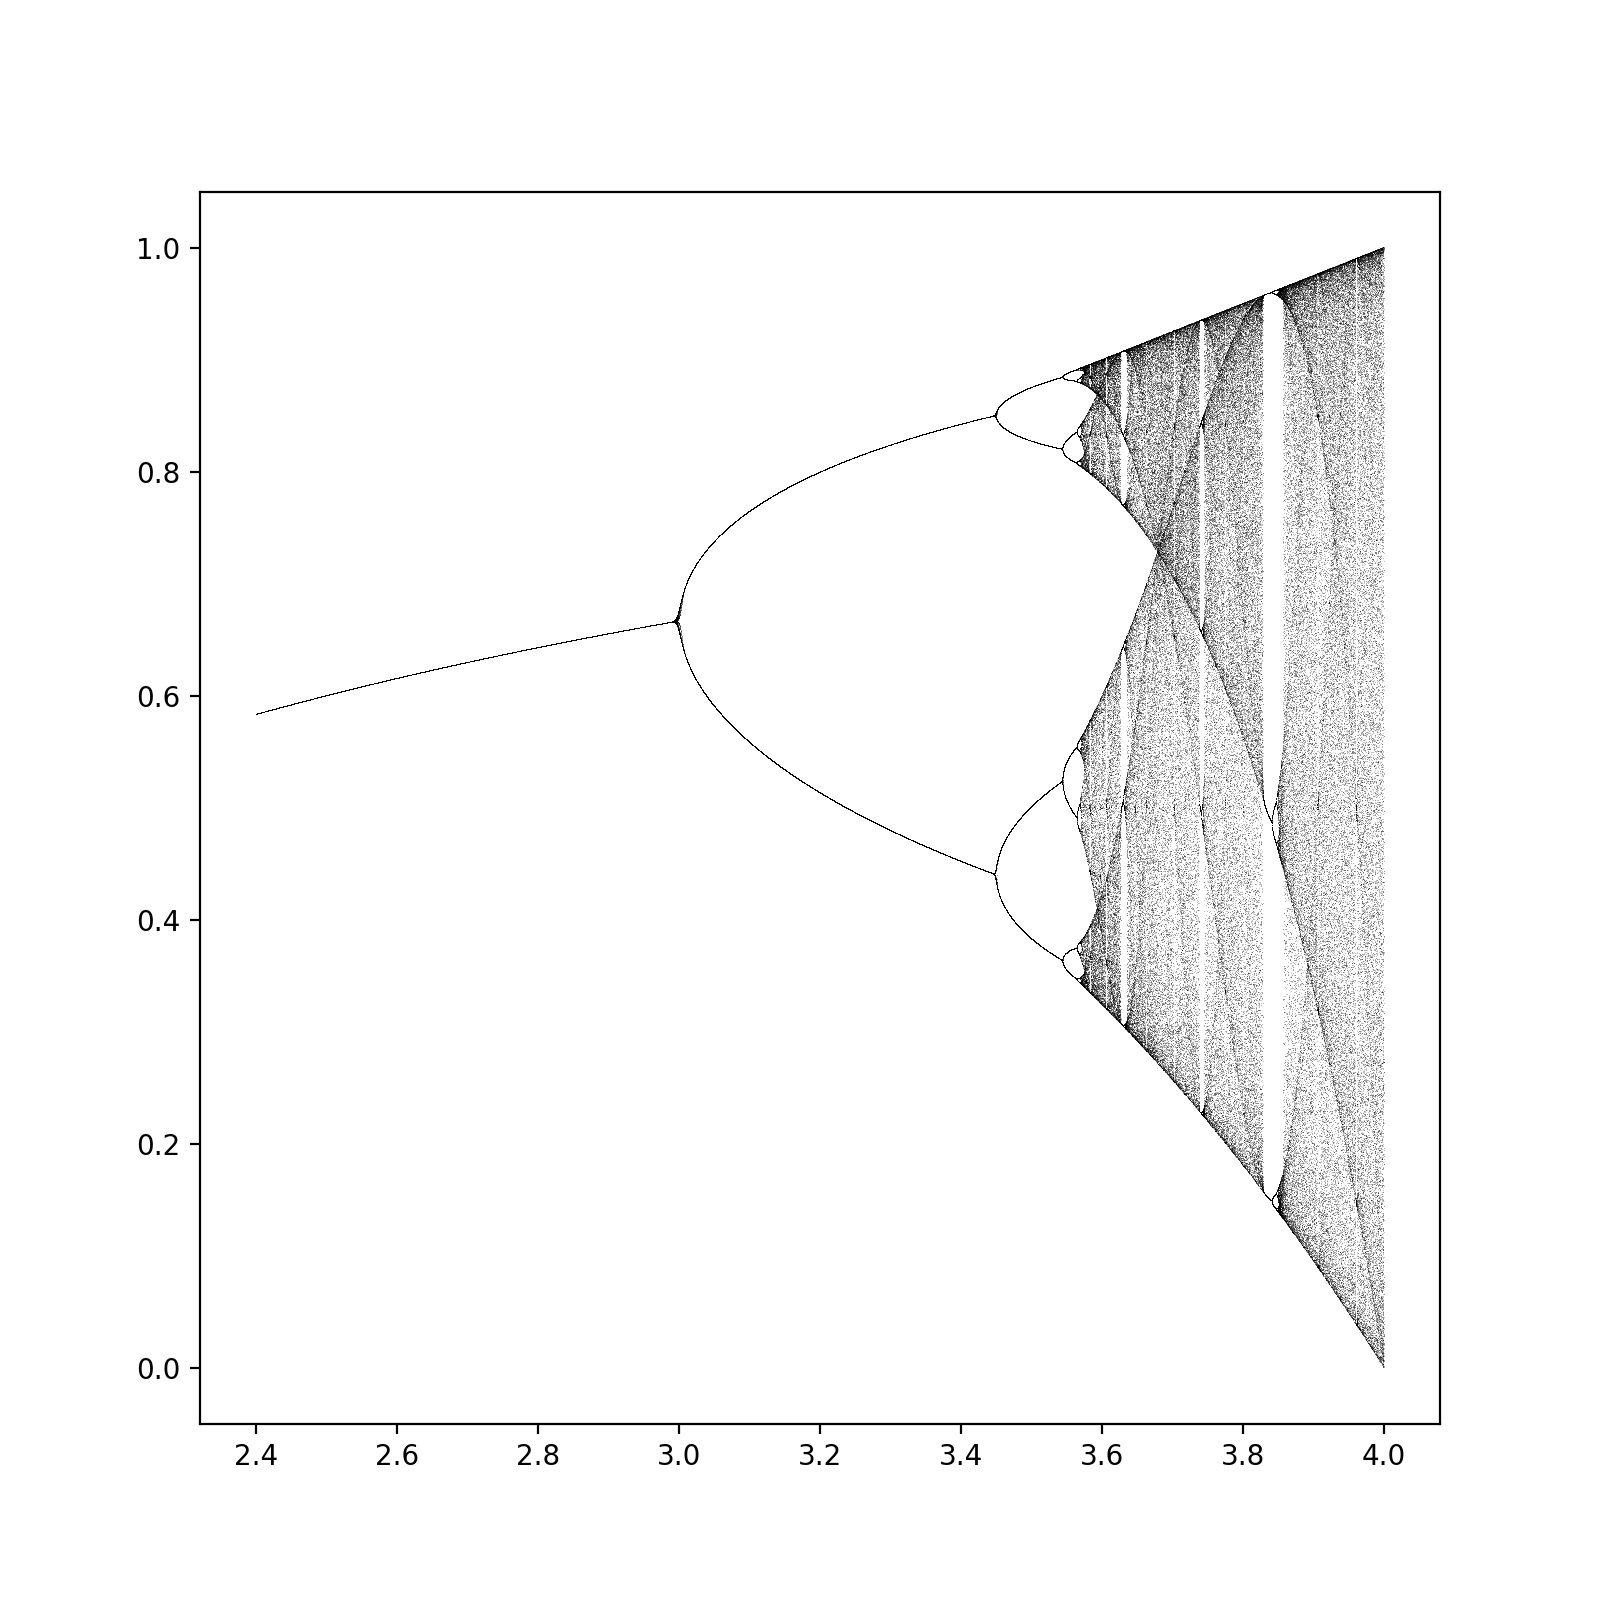

 ...]

In [19]:
plt.figure(figsize=[8,8])
r = np.linspace(rmin,4,10000) # échantillonnage de l'intervalle r
x=np.linspace(0,1,102)[1:-1] # échantillonnage des x initiaux
r,x = np.meshgrid(r,x) # on met tout ça dans une grille pour des calculs vectorisés
for k in range(500): # on regarde l'évolution après un certain nombre de cycles
    x = logistic(r,x)
plt.plot(r, x, ',k', alpha=0.25) # on utilise la transparence pour montrer l'intensité des sites

# Seconde version (plus rapide) en partant d'une unique _graine_

In [14]:
n = 10000 # nombre de points d'échantillonnage
r = np.linspace(rmin, 4.0, n) # échantillonnage de l'intervalle des r
x = 1e-5 * np.ones(n) # 1e-5 est notre graine

<IPython.core.display.Javascript object>


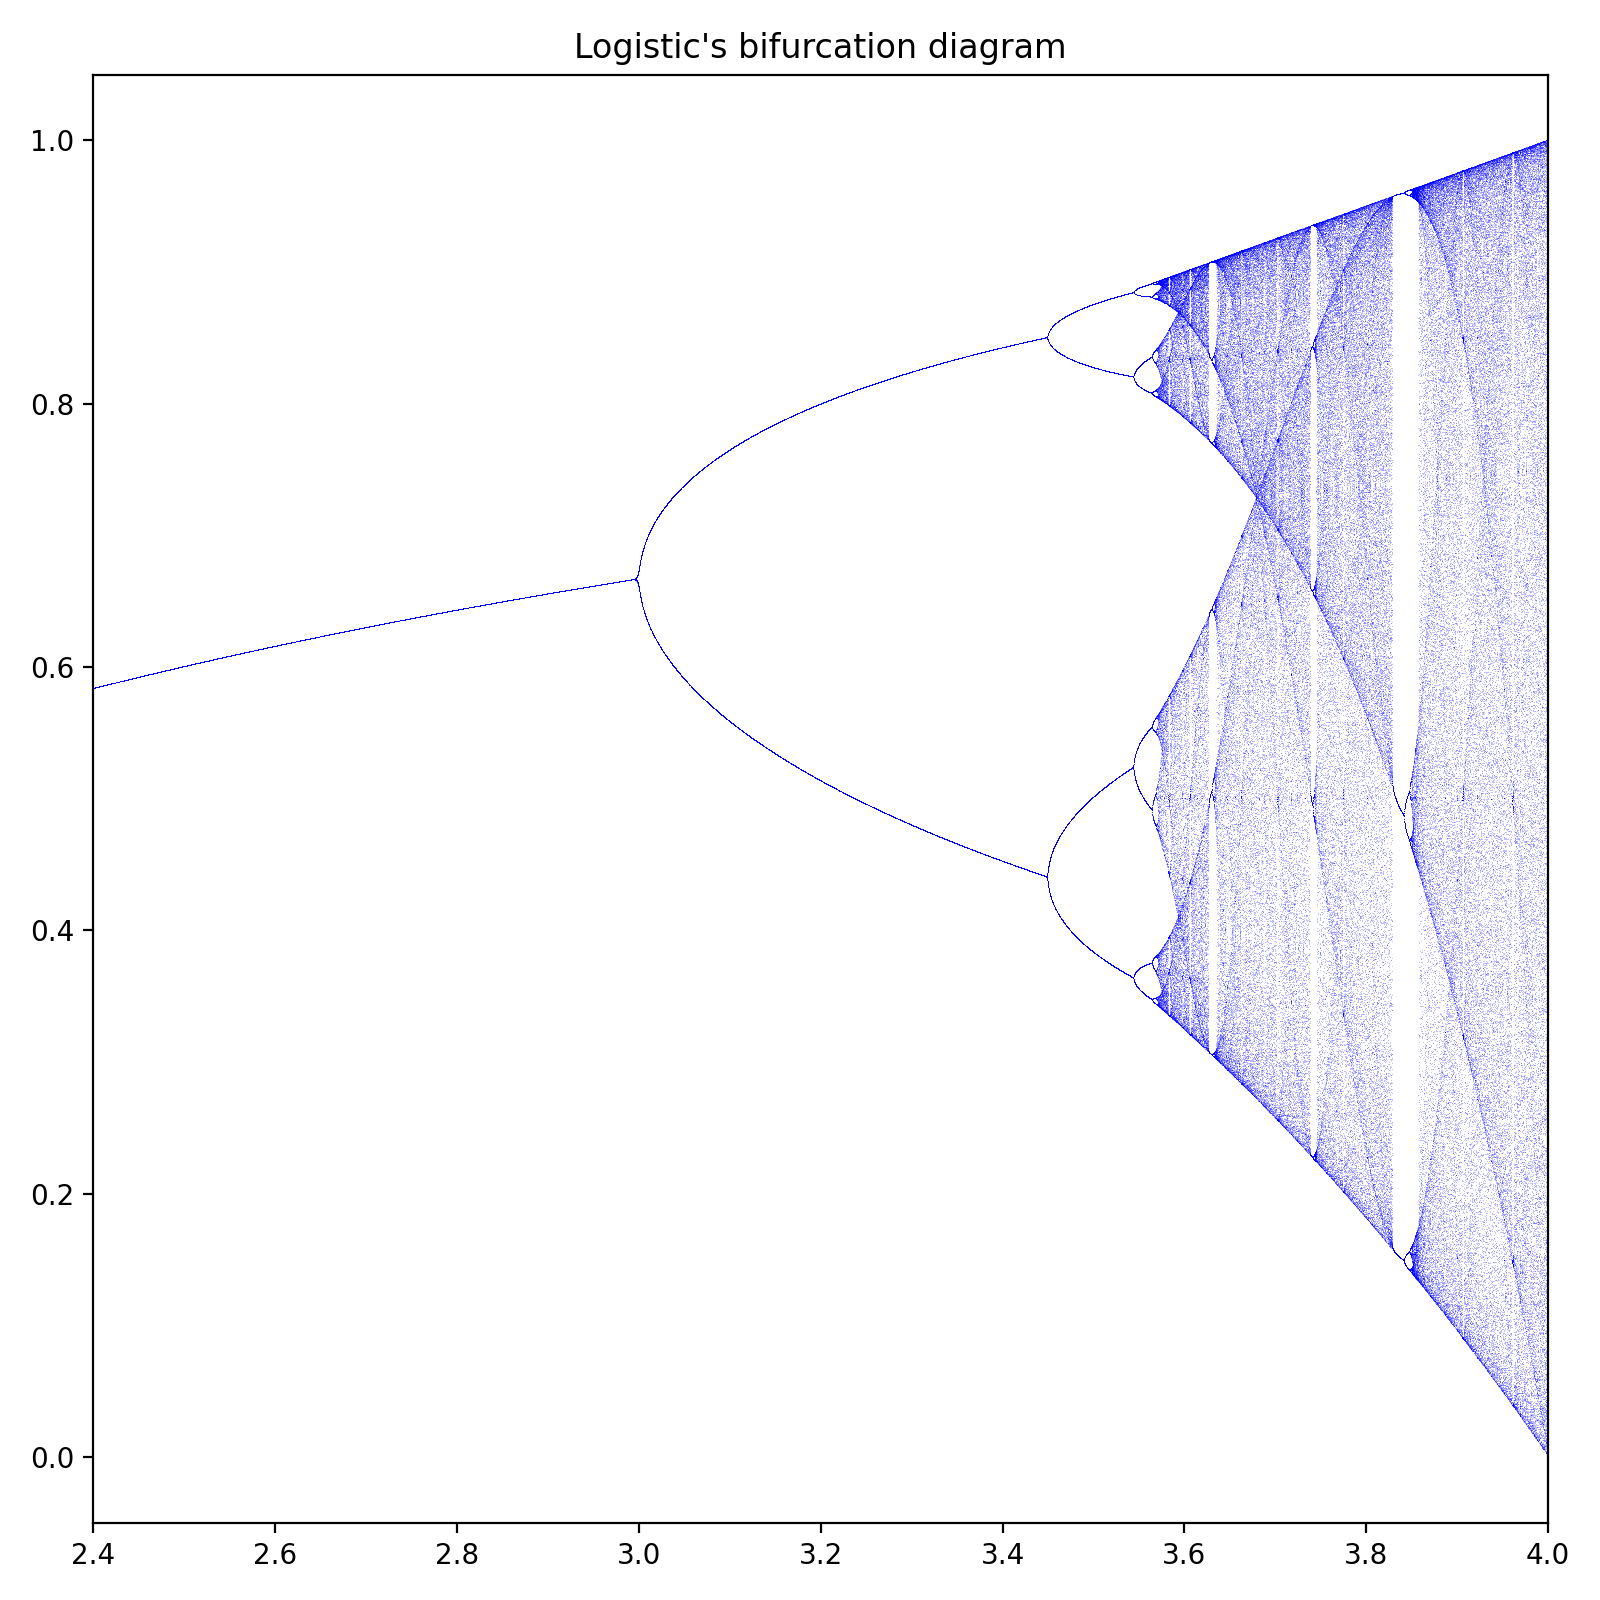

In [15]:
iterations = 1000 # on itére un certain nombre de fois 
last = 100 # et on ne conserve que les dernières itérations

fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))
for i in range(iterations):
    x = logistic(r, x)
    # Plot last iterations
    if i >= (iterations - last):
        # https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html
        ax1.plot(r, x,',b', alpha=.25)
ax1.set_xlim(rmin, 4)
ax1.set_title("Logistic's bifurcation diagram")
plt.tight_layout()

# Troisième version plus colorée
Bien moins rapide, moins fine mais on n'utilise plus le canal alpha pour l'intensité mais un histogramme

<IPython.core.display.Javascript object>


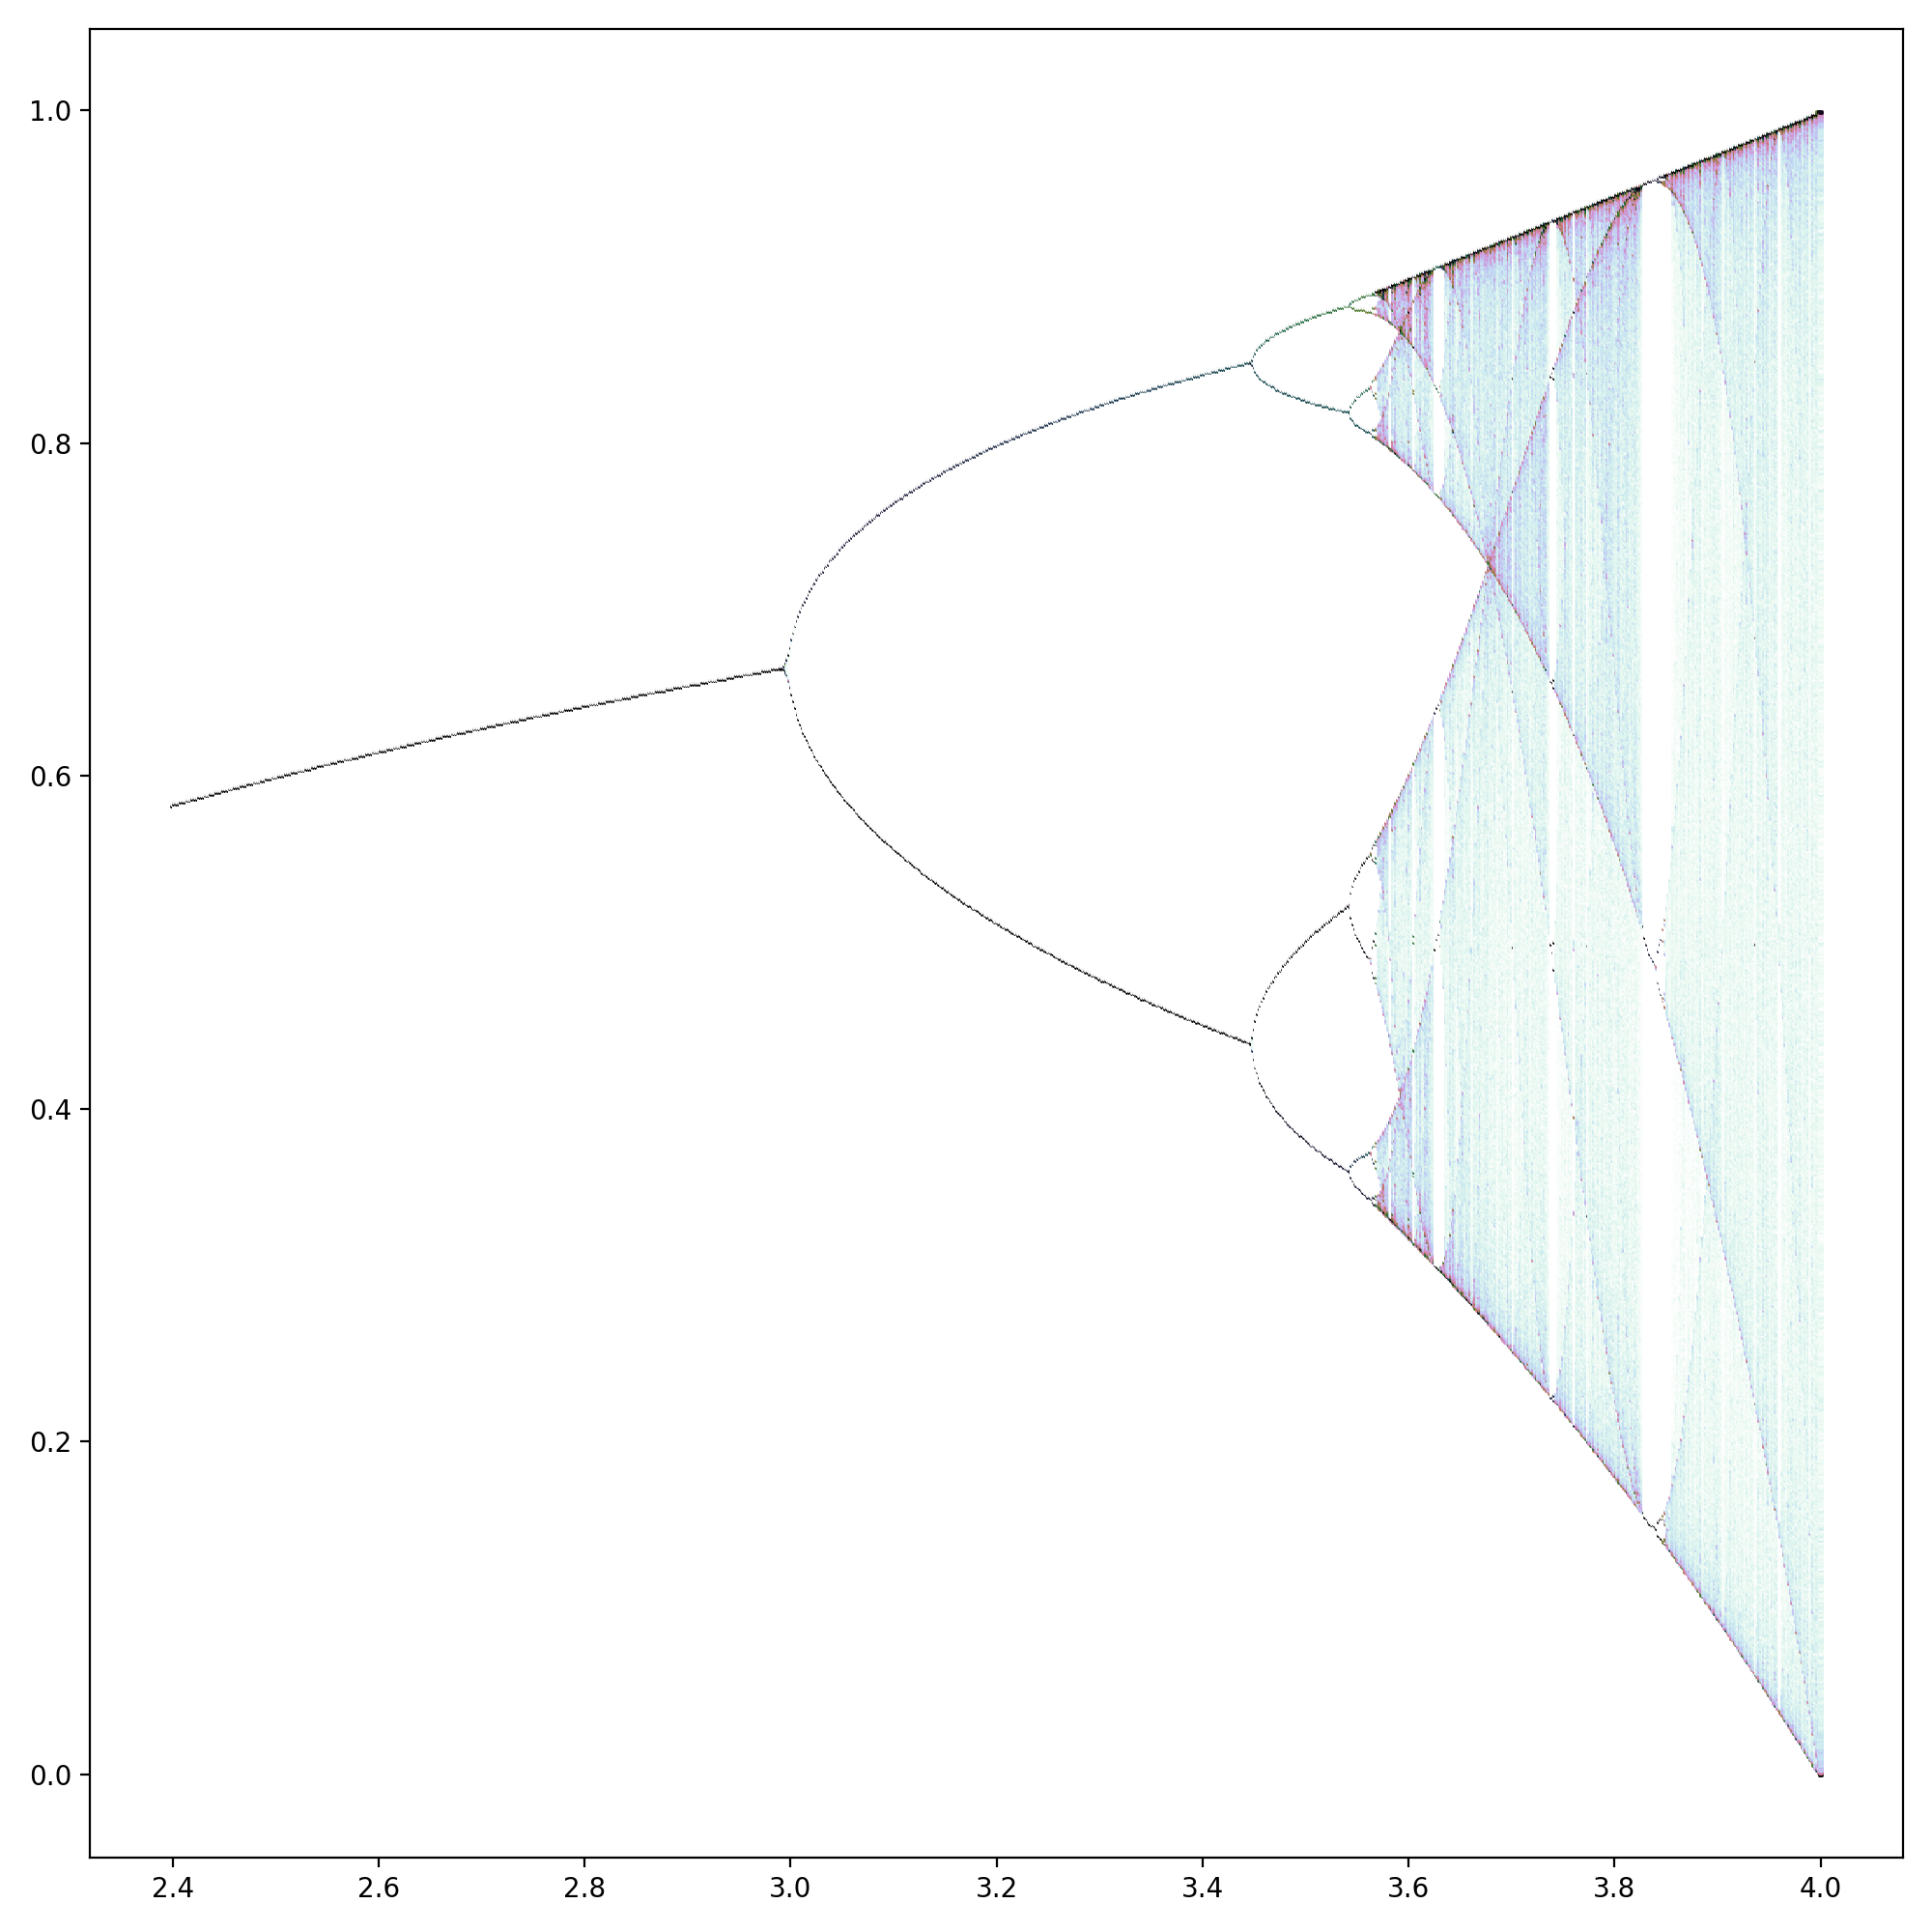

In [18]:
plt.figure(figsize=[10,10])
n=1000 # discretisation sur les deux axes
for r in np.linspace(rmin,4,n): # on le fait pour chaque valeur de r
    x=np.linspace(0,1,10*n)[1:-1]
    for k in range(500): 
        x = logistic(r,x)
    density, bins = np.histogram(x, bins=np.linspace(0,1,n), density=True)
    bins=bins[:-1] # remove last bins value (value 1)
    assert len(density) == len(bins)
    # choose your colormap : https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
    plt.scatter([r]*len(bins), bins, s=1, marker=',', c=1-density, cmap='cubehelix')
plt.tight_layout()